In [1]:
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
image1 = Image.open('ALLES.enc.png')

In [3]:
image1.show()

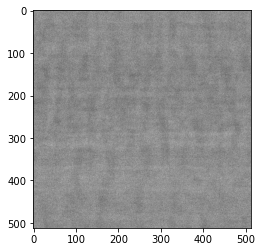

In [4]:
plt.imshow(image1)

In [5]:
original = Image.open('ALLES.enc.png')

In [6]:
original = original.convert("F")

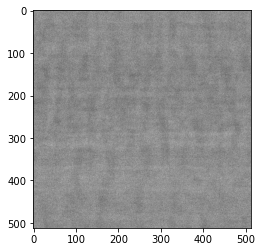

In [7]:
plt.imshow(original)

In [8]:
original.size

(512, 512)

In [9]:
width , height = original.size

In [10]:
original.getpixel((0,0))

147.0

In [11]:
ROUNDS = 32


In [12]:
djk= []
di ,dj = 313,42
for k in range(ROUNDS):
    di, dj = (di*di+dj)%512, (dj*dj+di)%512
    djk.append([di,dj])
    print(di,dj)
djk

219 29
374 36
136 134
198 172
464 86
342 180
408 486
38 60
480 54
54 324
168 70
134 460
496 278
22 468
440 422
486 348
0 246
246 100
200 6
70 236
16 470
214 244
472 358
422 124
32 438
438 388
232 454
6 12
48 150
406 20
504 294
358 412


[[219, 29],
 [374, 36],
 [136, 134],
 [198, 172],
 [464, 86],
 [342, 180],
 [408, 486],
 [38, 60],
 [480, 54],
 [54, 324],
 [168, 70],
 [134, 460],
 [496, 278],
 [22, 468],
 [440, 422],
 [486, 348],
 [0, 246],
 [246, 100],
 [200, 6],
 [70, 236],
 [16, 470],
 [214, 244],
 [472, 358],
 [422, 124],
 [32, 438],
 [438, 388],
 [232, 454],
 [6, 12],
 [48, 150],
 [406, 20],
 [504, 294],
 [358, 412]]

In [13]:
# for i in range(512):
#     for j in range(512):
#             for k in range(32):
                

In [14]:
i , j = 0 , 0

In [15]:
for k in range(32):
    print((i+djk[k][0])%512 , (j + djk[k][1] + (i + djk[k][0])//width) %512 )

219 29
374 36
136 134
198 172
464 86
342 180
408 486
38 60
480 54
54 324
168 70
134 460
496 278
22 468
440 422
486 348
0 246
246 100
200 6
70 236
16 470
214 244
472 358
422 124
32 438
438 388
232 454
6 12
48 150
406 20
504 294
358 412


In [16]:
lest = [150,57,180,115,108,215,174,78,205,149,188,97,155,178,238,45,33,40,218,219,181,178,167,151,165,14,188,94,93,67,225,41,158,130,163,51,186,33,247,120,52,78,121,13,229,71,81,89,214,29,252,218,19,87,125,31,18,229,4,104,87,200,88,236]

In [17]:
string  =""
for i in lest:
    string+=chr(i)


In [18]:
string

'\x969´sl×®NÍ\x95¼a\x9b²î-!(ÚÛµ²§\x97¥\x0e¼^]Cá)\x9e\x82£3º!÷x4Ny\råGQYÖ\x1düÚ\x13W}\x1f\x12å\x04hWÈXì'

In [19]:
sum_pixels = []
for i in range(512):
    for j in range(512):
        sum_pixels.append(int(32*original.getpixel((i,j))))

In [20]:
sum_pixels

[4704,
 4992,
 4544,
 4480,
 4960,
 4864,
 4768,
 5120,
 3872,
 5248,
 5344,
 4096,
 3424,
 3776,
 4480,
 5024,
 4640,
 4768,
 4896,
 4416,
 4640,
 4736,
 4256,
 4736,
 4480,
 4480,
 4928,
 4736,
 4320,
 4256,
 4736,
 4640,
 4896,
 4448,
 4832,
 4128,
 5312,
 5312,
 4896,
 4672,
 4288,
 3968,
 5344,
 4576,
 4960,
 4480,
 4448,
 4480,
 5152,
 4256,
 5344,
 4864,
 4928,
 4000,
 4480,
 5024,
 4448,
 4640,
 4448,
 4096,
 4000,
 4128,
 3616,
 4256,
 4064,
 3520,
 4832,
 3968,
 4160,
 4384,
 4224,
 4320,
 4000,
 3680,
 4768,
 4608,
 3456,
 4448,
 4512,
 4608,
 4544,
 3840,
 3776,
 5440,
 4576,
 4768,
 4608,
 3456,
 3904,
 4992,
 5472,
 4320,
 4832,
 4256,
 4448,
 4928,
 4768,
 3872,
 4256,
 4416,
 5312,
 4160,
 4672,
 4800,
 4224,
 4736,
 4736,
 4704,
 4416,
 4832,
 3328,
 4512,
 4736,
 3936,
 4960,
 4544,
 3328,
 3552,
 4000,
 4832,
 4224,
 3968,
 4800,
 4768,
 4064,
 4288,
 4224,
 3520,
 4896,
 5056,
 4512,
 4384,
 4896,
 4256,
 4384,
 4768,
 4768,
 3840,
 4128,
 3968,
 4992,
 3552,
 4736,

In [21]:
len(sum_pixels)

262144

In [22]:
input = []
for i in range(512):
    for j in range(512):
        eqn = []
        for k in range(32):
            eqn.append(512*int((djk[k][0]+i)%512)+(j+ djk[k][1] + (i + djk[k][0])//512)%512)
        input.append(eqn)


In [23]:
input


[[112157,
  191524,
  69766,
  101548,
  237654,
  175284,
  209382,
  19516,
  245814,
  27972,
  86086,
  69068,
  254230,
  11732,
  225702,
  249180,
  246,
  126052,
  102406,
  36076,
  8662,
  109812,
  242022,
  216188,
  16822,
  224644,
  119238,
  3084,
  24726,
  207892,
  258342,
  183708],
 [112158,
  191525,
  69767,
  101549,
  237655,
  175285,
  209383,
  19517,
  245815,
  27973,
  86087,
  69069,
  254231,
  11733,
  225703,
  249181,
  247,
  126053,
  102407,
  36077,
  8663,
  109813,
  242023,
  216189,
  16823,
  224645,
  119239,
  3085,
  24727,
  207893,
  258343,
  183709],
 [112159,
  191526,
  69768,
  101550,
  237656,
  175286,
  209384,
  19518,
  245816,
  27974,
  86088,
  69070,
  254232,
  11734,
  225704,
  249182,
  248,
  126054,
  102408,
  36078,
  8664,
  109814,
  242024,
  216190,
  16824,
  224646,
  119240,
  3086,
  24728,
  207894,
  258344,
  183710],
 [112160,
  191527,
  69769,
  101551,
  237657,
  175287,
  209385,
  19519,
  24581

In [24]:
import pickle

In [25]:
with open("input.pickle","wb") as f:
    pickle.dump(input,f)

In [26]:
with open("input.pickle","rb") as f:
    x = pickle.load(f)

In [27]:
x

[[112157,
  191524,
  69766,
  101548,
  237654,
  175284,
  209382,
  19516,
  245814,
  27972,
  86086,
  69068,
  254230,
  11732,
  225702,
  249180,
  246,
  126052,
  102406,
  36076,
  8662,
  109812,
  242022,
  216188,
  16822,
  224644,
  119238,
  3084,
  24726,
  207892,
  258342,
  183708],
 [112158,
  191525,
  69767,
  101549,
  237655,
  175285,
  209383,
  19517,
  245815,
  27973,
  86087,
  69069,
  254231,
  11733,
  225703,
  249181,
  247,
  126053,
  102407,
  36077,
  8663,
  109813,
  242023,
  216189,
  16823,
  224645,
  119239,
  3085,
  24727,
  207893,
  258343,
  183709],
 [112159,
  191526,
  69768,
  101550,
  237656,
  175286,
  209384,
  19518,
  245816,
  27974,
  86088,
  69070,
  254232,
  11734,
  225704,
  249182,
  248,
  126054,
  102408,
  36078,
  8664,
  109814,
  242024,
  216190,
  16824,
  224646,
  119240,
  3086,
  24728,
  207894,
  258344,
  183710],
 [112160,
  191527,
  69769,
  101551,
  237657,
  175287,
  209385,
  19519,
  24581

In [28]:
with open("output.pickle","wb") as f:
    pickle.dump(sum_pixels,f)

In [29]:
with open("output.pickle","rb") as f:
    x = pickle.load(f)

In [30]:
x

[4704,
 4992,
 4544,
 4480,
 4960,
 4864,
 4768,
 5120,
 3872,
 5248,
 5344,
 4096,
 3424,
 3776,
 4480,
 5024,
 4640,
 4768,
 4896,
 4416,
 4640,
 4736,
 4256,
 4736,
 4480,
 4480,
 4928,
 4736,
 4320,
 4256,
 4736,
 4640,
 4896,
 4448,
 4832,
 4128,
 5312,
 5312,
 4896,
 4672,
 4288,
 3968,
 5344,
 4576,
 4960,
 4480,
 4448,
 4480,
 5152,
 4256,
 5344,
 4864,
 4928,
 4000,
 4480,
 5024,
 4448,
 4640,
 4448,
 4096,
 4000,
 4128,
 3616,
 4256,
 4064,
 3520,
 4832,
 3968,
 4160,
 4384,
 4224,
 4320,
 4000,
 3680,
 4768,
 4608,
 3456,
 4448,
 4512,
 4608,
 4544,
 3840,
 3776,
 5440,
 4576,
 4768,
 4608,
 3456,
 3904,
 4992,
 5472,
 4320,
 4832,
 4256,
 4448,
 4928,
 4768,
 3872,
 4256,
 4416,
 5312,
 4160,
 4672,
 4800,
 4224,
 4736,
 4736,
 4704,
 4416,
 4832,
 3328,
 4512,
 4736,
 3936,
 4960,
 4544,
 3328,
 3552,
 4000,
 4832,
 4224,
 3968,
 4800,
 4768,
 4064,
 4288,
 4224,
 3520,
 4896,
 5056,
 4512,
 4384,
 4896,
 4256,
 4384,
 4768,
 4768,
 3840,
 4128,
 3968,
 4992,
 3552,
 4736,

In [31]:
output = Image.open("output.png")

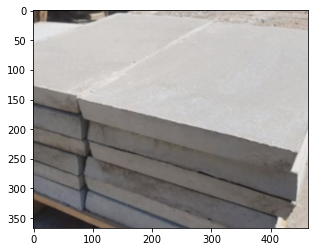

In [32]:
plt.imshow(output)

In [33]:
output.size

(464, 367)